Epoch 1 - Accuracy: 75.61% - Loss: 0.2439
Epoch 2 - Accuracy: 76.07% - Loss: 0.2393
Epoch 3 - Accuracy: 76.43% - Loss: 0.2357
Epoch 4 - Accuracy: 76.72% - Loss: 0.2328
Epoch 5 - Accuracy: 76.95% - Loss: 0.2305
Epoch 6 - Accuracy: 77.14% - Loss: 0.2286
Epoch 7 - Accuracy: 77.28% - Loss: 0.2272
Epoch 8 - Accuracy: 77.40% - Loss: 0.2260
Epoch 9 - Accuracy: 77.48% - Loss: 0.2252
Epoch 10 - Accuracy: 77.55% - Loss: 0.2245
Epoch 11 - Accuracy: 77.61% - Loss: 0.2239
Epoch 12 - Accuracy: 77.65% - Loss: 0.2235
Epoch 13 - Accuracy: 77.68% - Loss: 0.2232
Epoch 14 - Accuracy: 77.71% - Loss: 0.2229
Epoch 15 - Accuracy: 77.73% - Loss: 0.2227
Epoch 16 - Accuracy: 77.74% - Loss: 0.2226
Epoch 17 - Accuracy: 77.76% - Loss: 0.2224
Epoch 18 - Accuracy: 77.77% - Loss: 0.2223
Epoch 19 - Accuracy: 77.78% - Loss: 0.2222
Epoch 20 - Accuracy: 77.79% - Loss: 0.2221
Epoch 21 - Accuracy: 77.80% - Loss: 0.2220
Epoch 22 - Accuracy: 77.81% - Loss: 0.2219
Epoch 23 - Accuracy: 77.83% - Loss: 0.2217
Epoch 24 - Accuracy:

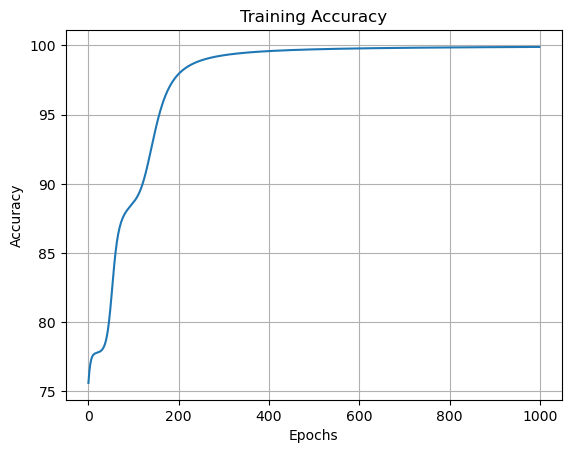

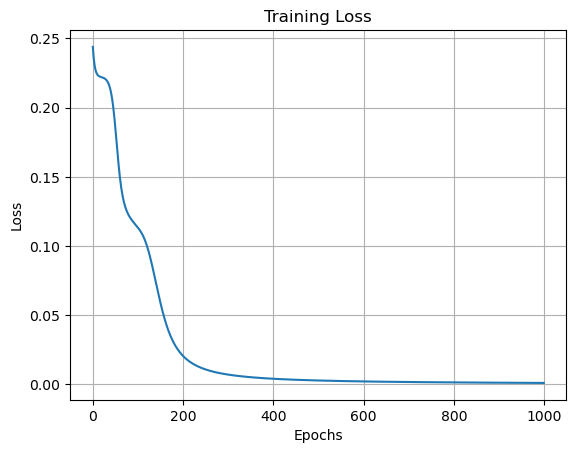

Image is of letter A


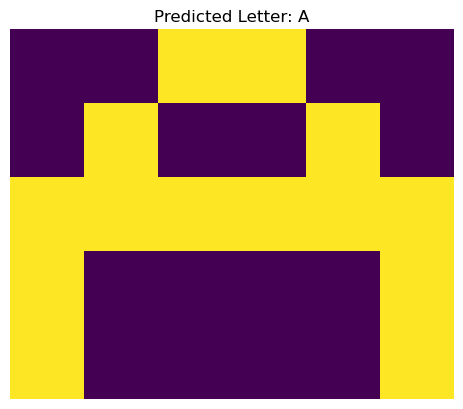

'A'

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def f_forward(X, w1, w2):
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a1, a2

# Loss function
def compute_loss(predicted, actual):
    return np.mean((predicted - actual) ** 2)

# Backpropagation
def back_prop(X, y, w1, w2, alpha):
    a1, a2 = f_forward(X, w1, w2)
    error = a2 - y
    d2 = error * sigmoid_derivative(a2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(a1)

    w2 -= a1.T.dot(d2) * alpha
    w1 -= X.T.dot(d1) * alpha
    return w1, w2

# Generate weights
def generate_wt(x, y):
    return np.random.randn(x, y) * 0.01

# Train model
def train(X, Y, w1, w2, alpha=0.1, epochs=100):
    acc_list = []
    loss_list = []
    for epoch in range(epochs):
        for i in range(len(X)):
            x_sample = X[i].reshape(1, -1)
            y_sample = Y[i].reshape(1, -1)
            w1, w2 = back_prop(x_sample, y_sample, w1, w2, alpha)

        # Evaluate after each epoch
        _, output = f_forward(X, w1, w2)
        loss = compute_loss(output, Y)
        acc = (1 - loss) * 100
        acc_list.append(acc)
        loss_list.append(loss)
        print(f"Epoch {epoch+1} - Accuracy: {acc:.2f}% - Loss: {loss:.4f}")
    return acc_list, loss_list, w1, w2

# Predict function
def predict(X, w1, w2):
    _, output = f_forward(X, w1, w2)
    pred = np.argmax(output)
    letter = ['A', 'B', 'C'][pred]
    print("Image is of letter", letter)
    plt.imshow(X.reshape(5,6))
    plt.title(f"Predicted Letter: {letter}")
    plt.axis("off")
    plt.show()
    return letter

# --------------------------
# Training data: A, B, C (6x5 pixels each)
# --------------------------
A = np.array([
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [1,1,1,1,1,1],
    [1,0,0,0,0,1],
    [1,0,0,0,0,1]
])

B = np.array([
    [0,1,1,1,1,0],
    [0,1,0,0,1,0],
    [0,1,1,1,1,0],
    [0,1,0,0,1,0],
    [0,1,1,1,1,0]
])

C = np.array([
    [0,1,1,1,1,0],
    [0,1,0,0,0,0],
    [0,1,0,0,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,1,0]
    
])

# Flatten images and build input/output
X = np.array([A.flatten(), B.flatten(), C.flatten()])
Y = np.array([[1,0,0], [0,1,0], [0,0,1]])  # A=100, B=010, C=001

# Initialize weights
np.random.seed(0)
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

# Train
acc_list, loss_list, w1, w2 = train(X, Y, w1, w2, alpha=0.5, epochs=1000)

# Plot accuracy
plt.plot(acc_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid(True)
plt.show()

# Plot loss
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

# Predict and visualize
predict(X[0], w1, w2)
